In [7]:
import albumentations as A
import cv2

rotate     = A.Compose([
        A.Rotate(5, border_mode=cv2.BORDER_REPLICATE, always_apply=True),
    ],
)

scale      = A.Compose([
        A.Affine(scale=(0.9,1.1), always_apply=True, mode=1),
    ],
)

horizontal = A.Compose([
        A.HorizontalFlip(always_apply=True),
    ],
)

In [8]:
aug_list = [
    rotate,
    scale,
    horizontal
]
compulsory_aug = A.Compose(
    [
        A.NoOp(always_apply=True)
    ],
    additional_targets={'image2': 'image'}
)

In [9]:
import os 
import numpy as np
from tqdm import tqdm

def augment_images(input_path, compulsory_aug, other_augs, output_path='/home/msc2/DATA/train'):
    input_path_list = [i for i in sorted(os.listdir(input_path)) if 'flair' in i]
    for path in tqdm(input_path_list, 'Images : '):
        full_path = os.path.join(input_path, path)
        full_flair_path = full_path
        full_mask_path  = full_path[:-9] + 'mask.png'
        
        flair     = cv2.imread(full_flair_path, 0)
        mask      = cv2.imread(full_mask_path, 0)
        
        # compulsory augs
        dict_ = compulsory_aug(image=flair, mask=mask)
        flair = dict_['image']
        mask  = dict_['mask']
        
        if not os.path.exists(output_path):
            os.mkdir(output_path)
        
        # saving these transformed images and masks
        file_name = output_path + '/' + path[:-9]
        cv2.imwrite(file_name + 'aug0_flair.png', flair)
        cv2.imwrite(file_name + 'aug0_mask.png', mask)
        # other augs
        i=1
        for aug in other_augs:
            dict_ = aug(image=flair, mask=mask)
            flair_aug = dict_['image']
            mask_aug  = dict_['mask']
            # saving these transformed images and masks
            cv2.imwrite(file_name + f'aug{i}_flair.png', flair_aug)
            cv2.imwrite(file_name + f'aug{i}_mask.png', mask_aug)
            i+=1

In [10]:
augment_images('/home/msc2/DATA/Slices/train', compulsory_aug, aug_list)

Images : 100%|███████████████████████████████| 835/835 [00:02<00:00, 358.48it/s]


Text(0.5, 1.0, 'Augmented')

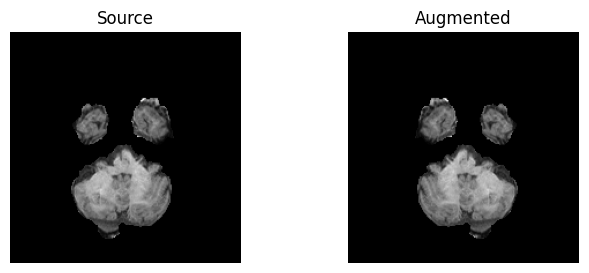

In [231]:
import matplotlib.pyplot as plt
image = np.load('/home/msc2/DATA/Slices/Final_Slices/train/amst_100_IMG0035_t1.npy')
aug   = np.load('/home/msc2/DATA/train/amst_100_IMG0035_aug4_t1.npy')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3), sharex=True, sharey=True)
for aa in (ax1, ax2):
    aa.set_axis_off()

ax1.imshow(image, cmap='gray')
ax1.set_title('Source')
ax2.imshow(aug, cmap='gray')
ax2.set_title('Augmented')

In [28]:
image.min()

-0.59913397

In [29]:
aug.min()

-0.599134